# Tarefa


# **Questão**

Você é um analista financeiro de uma grande corretora de investimentos. Essa corretora
pede que você adquira os dados de 5 ações da bolsa de valores de São Paulo - B3 -
e o índice que a compõe. As cinco ações escolhidas ficará a seu critério. Com isso a
corretora pede:


## a) 

Escolha cinco ações para análise: Você deve selecionar cinco ações de sua preferência e obter dados históricos de preços dessas ações, além do índice que as
compõe.


In [1]:
# !pip install yfinance

In [ ]:
from warnings import filterwarnings

from plotly.offline import init_notebook_mode
from scipy import optimize
from scipy.stats import norm

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import yfinance as yf

filterwarnings("ignore")  # Ignora os avisos que o Python pode exibir

init_notebook_mode()  # Inicializa o modo de notebook para permitir a visualização de gráficos interativos no Jupyter Notebook e que continuem interativos quando exportado para HTML

np.random.seed(
    42
)  # Definição de uma semente para gerar valores aleatórios, garantindo que os resultados sejam reproduzíveis

### Definindo as ações escolhidas e o índice IBOV

- ABEV3.SA: **Ambev** - Consumo não Cíclico
- BBAS3.SA: **Banco do Brasil** - Financeiro
- OIBR3.SA: **Oi S.A** - Telecomunicações
- PETR4.SA - **Petróleo Brasileiro S.A. Petrobras** - Petróleo, Gás e Biocombustíveis
- VALE3.SA: **Vale** - Materiais Básicos
- ^BVSP: **Ibovespa** 


In [ ]:
acoes = ["ABEV3.SA", "BBAS3.SA", "OIBR3.SA", "PETR4.SA", "VALE3.SA", "^BVSP"]

# Baixando os dados históricos das ações e do índice
df_acoes_indice = yf.download(acoes, start="2014-01-01", end="2024-01-01")["Adj Close"]

df_acoes_indice.index = df_acoes_indice.index.strftime("%Y-%m-%d")

df_acoes_indice.head(10)

[*********************100%***********************]  6 of 6 completed


Ticker       ABEV3.SA  BBAS3.SA     OIBR3.SA  PETR4.SA   VALE3.SA    ^BVSP
Date                                                                      
2014-01-02  11.417545  5.914830  2619.485107  5.042313  17.841442  50341.0
2014-01-03  11.174620  5.976443  3268.759277  4.967053  17.457037  50981.0
2014-01-06  11.030177  5.887721  3089.649170  5.003179  17.472414  50974.0
2014-01-07  11.378153  5.786674  3022.482910  4.864702  17.041883  50430.0
2014-01-08  11.489768  5.670845  3082.186279  4.873734  17.159767  50577.0
2014-01-09  11.220582  5.458895  3112.037842  4.726228  16.549843  49322.0
2014-01-10  11.292802  5.656055  3261.296143  4.807507  16.529348  49696.0
2014-01-13  11.187752  5.594444  3328.462646  4.747300  16.421709  49427.0
2014-01-14  11.154924  5.771889  3425.480469  4.726228  16.411463  49703.0
2014-01-15  11.227573  5.710277  3500.109619  4.828578  16.631853  50105.0

In [4]:
# Visualizando as informações dos dados
df_acoes_indice.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2484 entries, 2014-01-02 to 2023-12-28
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ABEV3.SA  2484 non-null   float64
 1   BBAS3.SA  2484 non-null   float64
 2   OIBR3.SA  2484 non-null   float64
 3   PETR4.SA  2484 non-null   float64
 4   VALE3.SA  2484 non-null   float64
 5   ^BVSP     2476 non-null   float64
dtypes: float64(6)
memory usage: 135.8+ KB


In [5]:
# Limpando dados ausentes
df_acoes_indice.dropna(inplace=True)
df_acoes_indice.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2476 entries, 2014-01-02 to 2023-12-28
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ABEV3.SA  2476 non-null   float64
 1   BBAS3.SA  2476 non-null   float64
 2   OIBR3.SA  2476 non-null   float64
 3   PETR4.SA  2476 non-null   float64
 4   VALE3.SA  2476 non-null   float64
 5   ^BVSP     2476 non-null   float64
dtypes: float64(6)
memory usage: 135.4+ KB


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


## b) 

Realize uma análise gráfica descritiva temporal do preço das ações: Você deve
plotar os dados de preços das ações ao longo do tempo para cada uma das ações
selecionadas e para o índice. Visualize como o preço das ações mudou ao longo
do tempo e identifique possíveis tendências.


In [ ]:
fig = go.Figure()

# Adicionando uma linha para cada ação e indice no gráfico
for acao in acoes:
    fig.add_trace(
        go.Scatter(
            x=df_acoes_indice.index, y=df_acoes_indice[acao], mode="lines", name=acao
        )
    )

fig.update_layout(
    title="Evolução Temporal dos Preços das Ações e do Índice IBOV",
    xaxis_title="Data",
    yaxis_title="Preço de Fechamento Ajustado (R$)",
    hovermode="x unified",
)
fig.show()

### Análise do Gráfico

O índice <span style="color:aqua">IBOV (**Ibovespa**)</span> exibe uma tendência de crescimento ao longo do período, com oscilações que refletem os períodos de alta e baixa do mercado acionário brasileiro. Houve quedas acentuadas em torno de 2020, possivelmente associadas à pandemia de COVID-19, que causou grande volatilidade no mercado global. Após essa queda, observa-se o o índice mostra uma recuperação contínua até o presente, o que sugere uma retomada de confiança no mercado brasileiro.

As ações das empresas (<span style="color:blue">ABE3V.SA</span>, <span style="color:red">BBAS3.SA</span>, <span style="color:green">OIBR3.SA</span>, <span style="color:purple">PETR4.SA</span> e <span style="color:orange">VALE3.SA</span>) aparecem com valores de preços ajustados muito menores em comparação ao índice <span style="color:aqua">IBOV</span>, o que pode tornar difícil analisar visualmente as oscilações individuais no mesmo gráfico, somente colocando a seta do mouse no gráfico para mostrar os valores das ações na pequena janela de legenda do gráfico. Ao colocar a seta do mouse no intervalo de 2020 observamos que os preços das ações tem o mesmo comportamento igual ao índice <span style="color:aqua">IBOV</span> de queda acentuada igual, provavelmente relacionada à pandemia de COVID-19.

Resumindo houve uma tendência de crescimento do índice <span style="color:aqua">IBOV </span> ao longo do tempo, com momentos de alta volatilidade, especialmente em períodos de crise. As ações individuais seguem o comportamento do índice.


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


## c) 

Realize uma análise gráfica descritiva temporal do retorno das ações: Você deve
calcular os retornos diários das ações e do índice e plotar os dados de retorno
ao longo do tempo para cada uma das ações e para o índice. Visualize como o
retorno das ações mudou ao longo do tempo e identifique possíveis padrões.


### Calculando a taxa dos retornos diários

A taxa de retorno é dada pela seguinte expressão:
$$E[Ri] = \log \left(\frac{P_t}{P_{t-1}}\right)$$


In [7]:
# Calculando os retornos diários
df_taxas_retornos_diarios = df_acoes_indice.pct_change()
df_taxas_retornos_diarios.head(10)

Ticker      ABEV3.SA  BBAS3.SA  OIBR3.SA  PETR4.SA  VALE3.SA     ^BVSP
Date                                                                  
2014-01-02       NaN       NaN       NaN       NaN       NaN       NaN
2014-01-03 -0.021277  0.010417  0.247863 -0.014926 -0.021546  0.012713
2014-01-06 -0.012926 -0.014845 -0.054795  0.007273  0.000881 -0.000137
2014-01-07  0.031548 -0.017162 -0.021739 -0.027678 -0.024641 -0.010672
2014-01-08  0.009810 -0.020017  0.019753  0.001857  0.006917  0.002915
2014-01-09 -0.023428 -0.037375  0.009685 -0.030266 -0.035544 -0.024814
2014-01-10  0.006436  0.036117  0.047962  0.017197 -0.001238  0.007583
2014-01-13 -0.009302 -0.010893  0.020595 -0.012524 -0.006512 -0.005413
2014-01-14 -0.002934  0.031718  0.029148 -0.004439 -0.000624  0.005584
2014-01-15  0.006513 -0.010675  0.021786  0.021656  0.013429  0.008088

In [ ]:
# Removendo valores ausentes
df_taxas_retornos_diarios.dropna(inplace=True)
print(f"Media dos retornos diarios: {df_taxas_retornos_diarios.mean().round(4) * 100}")
print(
    f"\nDesvio padrao dos retornos diarios: {df_taxas_retornos_diarios.std().round(4) * 100}"
)

Media dos retornos diarios: Ticker
ABEV3.SA    0.02
BBAS3.SA    0.10
OIBR3.SA   -0.12
PETR4.SA    0.13
VALE3.SA    0.09
^BVSP       0.05
dtype: float64

Desvio padrao dos retornos diarios: Ticker
ABEV3.SA    1.68
BBAS3.SA    2.72
OIBR3.SA    4.90
PETR4.SA    3.14
VALE3.SA    2.78
^BVSP       1.57
dtype: float64


### Plotando resultados


In [ ]:
fig = go.Figure()

for acao in acoes:
    fig.add_trace(
        go.Scatter(
            x=df_taxas_retornos_diarios.index,
            y=df_taxas_retornos_diarios[acao],
            mode="lines",
            name=acao,
        )
    )

fig.update_layout(
    title="Registros Temporal das Taxas Retornos Diários das Ações e do Índice IBOV",
    xaxis_title="Data",
    yaxis_title="Retorno Diário (%)",
    hovermode="x unified",
)

fig.show()

### Análise do grafico

Analisando algumas ações, como <span style="color:green">OIBR3.SA (**Oi**)</span> e <span style="color:orange">VALE3.SA (**Vale**)</span>, apresentam maiores variações em determinados períodos. Esses retornos extremos podem ser devidos a eventos específicos, como notícias corporativas, mudanças regulatórias ou eventos econômicos significativos que afetaram drasticamente essas empresas.

Houve picos de volatilidade em diferentes momentos, especialmente durante períodos de crise ou incerteza no mercado, como por volta de 2020 (provavelmente devido à pandemia de COVID-19), onde se observam grandes flutuações tanto positivas quanto negativas.

O índice <span style="color:aqua">IBOV (**Ibovespa**)</span> tende a ser menos volátil em comparação com algumas das ações individuais. Entre as cinco ações, percebe-se que algumas têm oscilações maiores que outras, como <span style="color:orange">VALE3.SA (**Vale**)</span>  e <span style="color:purple">PETR4.SA (**Petrobras**)</span> , que representam setores de recursos naturais e são altamente suscetíveis a variações de preço, de acordo com fatores externos como preços de petróleo e minério.

Análisando os riscos e oportunidades para ações com retornos diários altamente voláteis, como <span style="color:green">OIBR3.SA</span>, podem oferecer oportunidades de alto retorno, mas também possuem um risco elevado.


### Mapa de Calor


In [ ]:
# Visualizando a matriz de correlação entre as ações e o indice por mapa de calor
fig = px.imshow(
    df_taxas_retornos_diarios.corr().round(2),
    text_auto=True,
    title="Matriz de Correlação dos Retornos Diários das Ações e do Índice IBOV",
    width=800,
    height=800,
    color_continuous_scale="RdYlBu",
)
fig.show()

### Analisando o mapa de calor

As ações BBAS3.SA e PETR4.SA apresentam as maiores correlações superior a 70\% com o índice IBOV. Isso sugere que estas ações têm um comportamento mais alinhado com o mercado geral representado pelo IBOV, o que é comum em ações de empresas grandes e relevantes na economia. 

Ações ABEV3.SA e VALE3.SA têm correlações abaixo de 60\% com o índice IBOV e com outras ações, sugerindo que elas podem ser consideradas em uma estratégia de diversificação, pois possuem movimentos menos sincronizados com o mercado geral.

Por último, OIBR3.SA possui as menores correlações com as outras ações e com o índice IBOV, com valores de correlação entre 14\% e 28\%. Isso indica que os retornos da OIBR3.SA são menos afetados por fatores de mercado amplos e provavelmente são impulsionados por eventos específicos da empresa ou do setor em que atua.


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


## d) 

Monte um conjunto de carteiras simuladas da fronteira eficiente: Você deve simular um grande número de carteiras aleatórias que contenham as ações selecionadas
e calcular o retorno e o risco de cada carteira. Você deve usar a simulação Monte
Carlo para criar 50.000 carteiras simuladas e plotar a fronteira eficiente de Markowitz. Isso permitirá a você identificar a carteira com o melhor índice de Sharpe.


### Definindo parametros


In [ ]:
# Número de carteiras simuladas e de ações
numero_carteiras = 50000
df_acoes = df_acoes_indice.drop(labels=["^BVSP"], axis=1).copy()
numero_acoes = len(df_acoes.columns)

# Definindo as array de armazenhamentos
array_pesos = np.zeros((numero_carteiras, numero_acoes))
array_retornos = np.zeros(numero_carteiras)
array_volatilidades = np.zeros(numero_carteiras)
array_sharpe = np.zeros(numero_carteiras)

df_logaritmo_retorno_acoes = np.log(df_acoes / df_acoes.shift(1))

### Simulando 50.000 carteiras aleatórias pelo metodo Monte Carlo


In [ ]:
np.random.seed(42)

for x in range(numero_carteiras):
    # Pesos
    pesos = np.array(np.random.random(numero_acoes))
    pesos = pesos / np.sum(pesos)
    array_pesos[x, :] = pesos

    # Retornos experados
    array_retornos[x] = np.sum((df_logaritmo_retorno_acoes.mean() * pesos))

    # Volatibilidades esperadas
    array_volatilidades[x] = np.sqrt(
        np.dot(pesos.T, np.dot(df_logaritmo_retorno_acoes.cov(), pesos))
    )

    # Sharpe Ratio
    array_sharpe[x] = array_retornos[x] / array_volatilidades[x]

In [ ]:
maximo_sharpe = array_sharpe.max()
print(f"Valor Maximo Sharpe Ratio: {maximo_sharpe.round(4)}")

posicao_maximo_sharpe = array_sharpe.argmax()
print("Posisão do Valor Maximo Sharpe Ratio: {}".format(posicao_maximo_sharpe))

# Salvando os dados da posição do maximo Sharpe Ratio
maximo_retorno = array_retornos[posicao_maximo_sharpe]
maximo_volatilidade = array_volatilidades[posicao_maximo_sharpe]

print(f"Valor Maximo de Retorno: {maximo_retorno.round(4)}")
print(f"Valor Maximo de Volatilidade: {maximo_volatilidade.round(4)}")

Valor Maximo Sharpe Ratio: 0.0273
Posisão do Valor Maximo Sharpe Ratio: 26007
Valor Maximo de Retorno: 0.0006
Valor Maximo de Volatilidade: 0.0235


### Plotando os resultados


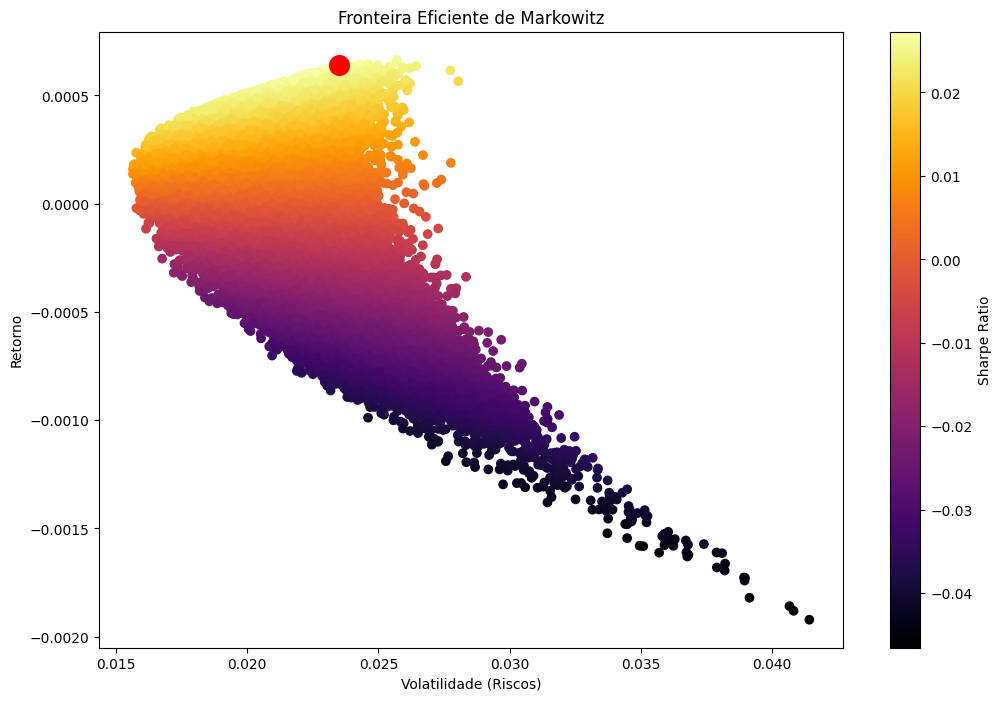

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(array_volatilidades, array_retornos, c=array_sharpe, cmap="inferno")
plt.colorbar(label="Sharpe Ratio")
plt.xlabel("Volatilidade (Riscos)")
plt.ylabel("Retorno")
plt.scatter(maximo_volatilidade, maximo_retorno, c="red", s=200)
plt.title("Fronteira Eficiente de Markowitz")
plt.show()

### Analisando do gráfico

A Fronteira Eficiente de Markowitz mostra as melhores combinações de risco e retorno entre portfólios, destacando aqueles com maior retorno possível para um dado nível de risco. O eixo X representa a volatilidade (risco) e o eixo Y, o retorno esperado. 

Na parte superior esquerda da curva, estão os portfólios ótimos, que maximizam o retorno para cada nível de risco. A Razão de Sharpe, indicada pelas cores dos pontos, mede o retorno ajustado ao risco, e o portfólio de tangência, em vermelho, representa a máxima Razão de Sharpe, sendo ideal para investidores que buscam o melhor equilíbrio entre risco e retorno. 

A análise demonstra que a diversificação pode otimizar o retorno e que portfólios fora da fronteira são ineficientes, oferecendo menos retorno para o mesmo nível de risco.


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


## e) 

Identifique a carteira com melhor índice de Sharpe: Você deve escolher a carteira com o melhor índice de Sharpe, que é uma medida de risco-retorno. Você
deve plotar a carteira selecionada no gráfico das carteiras simuladas e destacar a
fronteira eficiente de Markowitz.


### Definição funções


In [ ]:
def obter_ret_vol_sha(pesos):
    """
    Obtem o retorno, volatilidade e o sharpe ratio de uma carteira
    """
    pesos = np.array(pesos)
    retorno = np.sum(df_logaritmo_retorno_acoes.mean() * pesos)
    volatilidade = np.sqrt(
        np.dot(pesos.T, np.dot(df_logaritmo_retorno_acoes.cov(), pesos))
    )
    sharpe = retorno / volatilidade
    return np.array([retorno, volatilidade, sharpe])


def negar_sharpe(pesos):
    """
    Retorna o valor negativo da relação de Sharpe para uma determinada carteira de pesos
    Indice 2 é o sharpe ratio
    """
    return obter_ret_vol_sha(pesos)[2] * -1


def verificar_soma(pesos):
    """
    Valida a cartera para soma de pesos se a soma for igual a 1 retorna 0
    """
    return np.sum(pesos) - 1


def obter_volatilidade(pesos):
    """
    Retorna da volatilidade para uma determinada carteira de pesos
    Indice 1 é a volatilidade
    """
    return obter_ret_vol_sha(pesos)[1]

### Otimização Pesos


In [ ]:
array_inicial = ((0.2), (0.2), (0.2), (0.2), (0.2))
metodo_otimizacao = "SLSQP"
limites = ((0, 1), (0, 1), (0, 1), (0, 1), (0, 1))
constantes = {"type": "eq", "fun": verificar_soma}
otimizacao = optimize.minimize(
    negar_sharpe,
    array_inicial,
    method=metodo_otimizacao,
    bounds=limites,
    constraints=constantes,
)
otimizacao

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.027307092597341053
       x: [ 0.000e+00  3.135e-01  1.427e-16  3.413e-01  3.451e-01]
     nit: 6
     jac: [ 4.779e-03 -2.933e-04  1.167e-01  2.512e-04  1.801e-05]
    nfev: 36
    njev: 6

### Criando coordenadas para Fonteira de Eficiente de Markowitz


In [ ]:
coordenadas_fronteira_x = []
coordenadas_fronteira_y = np.linspace(-0.0015, maximo_retorno, 250)

for ponto_retorno in coordenadas_fronteira_y:
    constantes = (
        {"type": "eq", "fun": verificar_soma},
        {"type": "eq", "fun": lambda w: obter_ret_vol_sha(w)[0] - ponto_retorno},
    )

    result = optimize.minimize(
        obter_volatilidade,
        array_inicial,
        method=metodo_otimizacao,
        bounds=limites,
        constraints=constantes,
    )
    coordenadas_fronteira_x.append(result["fun"])

### Plotando os resultados


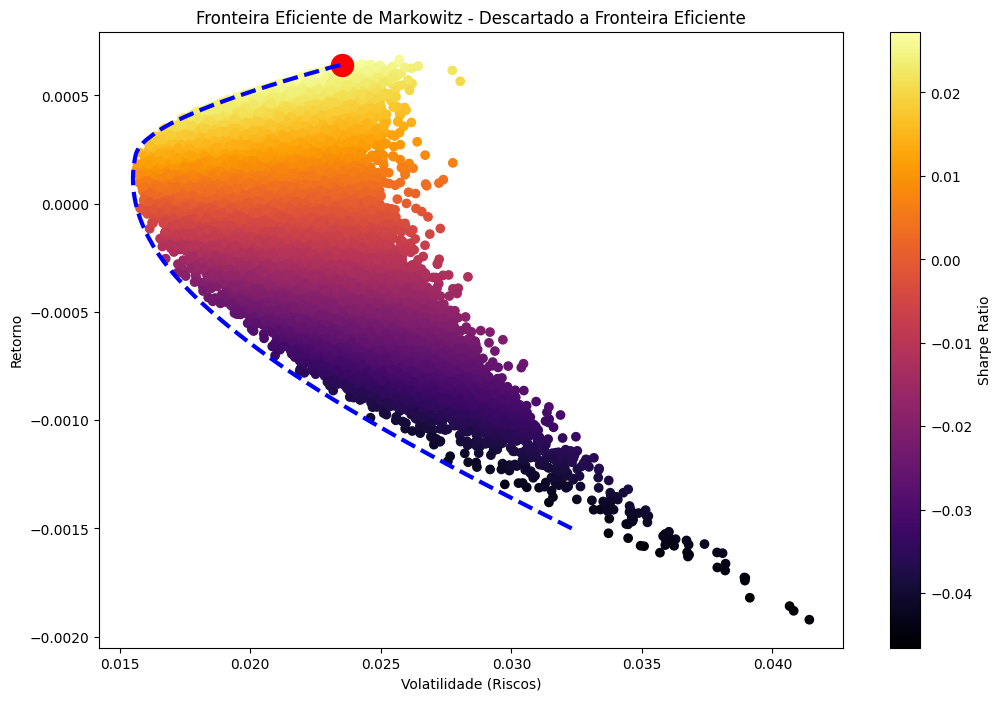

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(array_volatilidades, array_retornos, c=array_sharpe, cmap="inferno")
plt.colorbar(label="Sharpe Ratio")
plt.xlabel("Volatilidade (Riscos)")
plt.ylabel("Retorno")
plt.plot(coordenadas_fronteira_x, coordenadas_fronteira_y, "b--", linewidth=3)
plt.scatter(maximo_volatilidade, maximo_retorno, c="red", s=250)
plt.title("Fronteira Eficiente de Markowitz - Descartado a Fronteira Eficiente")
plt.show()

### Análise do Gráfico

O gráfico da Fronteira Eficiente destaca os portfólios ideais que maximizam o retorno para cada nível de risco, formando uma curva onde o portfólio de tangência (ponto vermelho) apresenta a maior Razão de Sharpe, sendo a melhor escolha para quem busca retorno ajustado ao risco. 

A nuvem de pontos coloridos ilustra portfólios subótimos, com cores escuras indicando menor eficiência de risco-retorno. A fronteira atende tanto investidores conservadores, que preferem menor risco, quanto arrojados, que aceitam maior volatilidade em busca de retornos mais altos. 

Esse gráfico enfatiza a importância da diversificação, maximizando o retorno potencial para um dado nível de risco e auxiliando na alocação de ativos.


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


## f) 

Ilustre a evolução de seu patrimônio: Você pode simular o desempenho da carteira
selecionada ao longo do tempo e calcular o retorno esperado. Você deve então
plotar a evolução do patrimônio com um investimento inicial de R$35.000,00.


### Definindo Função para simulação de alocação de ativos de ações


In [ ]:
def alocar_ativos_acoes(df, investimento, lista_melhores_pesos=[], seed=0):
    dataset = df.copy()

    if seed != 0:
        np.random.seed(seed)

    if len(lista_melhores_pesos) > 0:
        pesos = lista_melhores_pesos
    else:
        pesos = np.random.random(len(dataset.columns) - 1)
        pesos = pesos / pesos.sum()

    colunas = dataset.columns[1:]
    for i in colunas:
        dataset[i] = dataset[i] / dataset[i][0]

    for i, acao in enumerate(dataset.columns[1:]):
        dataset[acao] = dataset[acao] * pesos[i] * investimento

    datas = dataset["Date"]
    dataset.drop(labels=["Date"], axis=1, inplace=True)
    dataset["Soma Ganhos"] = dataset.sum(axis=1)

    dataset["Taxa Retorno"] = 0.0

    for i in range(1, len(dataset)):
        dataset["Taxa Retorno"][i] = (
            np.log(dataset["Soma Ganhos"][i] / dataset["Soma Ganhos"][i - 1]) * 100
        )

    acoes_pesos = pd.DataFrame(data={"Ações": colunas, "Pesos": pesos})

    return dataset, datas, acoes_pesos, dataset.loc[len(dataset) - 1]["Soma Ganhos"]

### Definindo o investimento inicial e simulando desempenho das carteira


In [ ]:
investimento_inicial = 35000
df_acoes_alocados, datas, acoes_pesos, soma_ultimo_ganho = alocar_ativos_acoes(
    df_acoes.reset_index(), investimento_inicial, array_pesos[posicao_maximo_sharpe, :]
)
df_acoes_alocados["Date"] = datas
df_acoes_alocados.set_index("Date", inplace=True)
df_acoes_alocados.tail(10)

Ticker       ABEV3.SA      BBAS3.SA  OIBR3.SA      PETR4.SA      VALE3.SA  \
Date                                                                        
2023-12-14  13.807669  52644.260866  0.003600  73561.690888  40777.382978   
2023-12-15  13.779101  53907.800659  0.003600  73728.320133  41032.933143   
2023-12-18  13.855281  53947.286153  0.003656  74644.706571  41227.373785   
2023-12-19  13.998118  54144.713624  0.003545  75498.614370  41516.264762   
2023-12-20  13.767852  53512.945716  0.003600  75769.385201  41382.929053   
2023-12-21  13.727771  53591.916705  0.003545  75790.200891  42760.697723   
2023-12-22  13.737792  53739.988302  0.003656  76519.155922  42438.475114   
2023-12-26  13.797914  54233.558969  0.003545  77747.976139  42588.476640   
2023-12-27  13.868055  54154.587980  0.003600  77810.441250  42999.586662   
2023-12-28  13.757832  54677.765808  0.003545  77560.517676  42888.470511   

Ticker        Soma Ganhos  Taxa Retorno  
Date                                     
2023-12-14  166997.146002      1.283414  
2023-12-15  168682.836635      1.004352  
2023-12-18  169833.225445      0.679668  
2023-12-19  171173.594419      0.786128  
2023-12-20  170679.031422     -0.289343  
2023-12-21  172156.546636      0.861943  
2023-12-22  172711.360786      0.321755  
2023-12-26  174583.813206      1.078316  
2023-12-27  174978.487547      0.225811  
2023-12-28  175140.515371      0.092556

In [21]:
soma_ultimo_ganho.round(4)

np.float64(175140.5154)

In [22]:
acoes_pesos

Ações     Pesos
0  ABEV3.SA  0.000327
1  BBAS3.SA  0.352352
2  OIBR3.SA  0.000041
3  PETR4.SA  0.340609
4  VALE3.SA  0.306671

### Plotando os resultados


In [ ]:
# Histórico de Retornos Diários do Portfólio ao Longo do Tempo
fig = px.line(
    x=df_acoes_alocados.index,
    y=df_acoes_alocados["Taxa Retorno"],
    title="Histórico de Retornos Diários do Portfólio ao Longo do Tempo",
    labels=dict(x="Data", y="Retorno %"),
)
fig.add_hline(
    y=df_acoes_alocados["Taxa Retorno"].mean(), line_color="red", line_dash="dot"
)
fig.show()

### Analise do Grafico do Histórico de Retornos Diários do Portfólio

O gráfico de Histórico de Retornos Diários mostra que a maioria dos retornos diários do portfólio está concentrada em torno de zero, refletindo variações moderadas na maior parte do tempo, com picos de alta volatilidade em anos como 2016, final de 2018 e 2020, especialmente no início da pandemia de COVID-19. 

A linha de retorno médio próxima de zero indica ausência de tendência diária consistente de valorização ou depreciação. Desde 2021, observa-se uma estabilização na volatilidade, com menos extremos. 

Essa análise temporal é crucial para avaliar a volatilidade, gerenciar riscos e ajustar o portfólio, permitindo estratégias mais alinhadas aos objetivos de risco e retorno do investidor.


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
# Evolução do patrimônio por ação da carteira ao Longo do Tempo
fig = px.line(title="Evolução do Patrimônio por Ação da Carteira ao Longo do Tempo")
for i in df_acoes_alocados.drop(columns=["Soma Ganhos", "Taxa Retorno"]).columns:
    fig.add_scatter(x=df_acoes_alocados.index, y=df_acoes_alocados[i], name=i)

fig.update_layout(xaxis_title="Data", yaxis_title="Valor R$", hovermode="x unified")

fig.show()

### Analise do Grafico da Evolução do Patrimônio por Ação da Carteira

O gráfico mostra que BBAS3.SA e VALE3.SA apresentaram o maior crescimento acumulado, com BBAS3.SA liderando entre 2022 e 2023, enquanto PETR4.SA teve crescimento significativo, mas mais volátil. ABEV3.SA manteve estabilidade com crescimento moderado, e OIBR3.SA apresentou o pior desempenho, praticamente estagnado. 

A crise de 2020 impactou quase todos os ativos, exceto OIBR3.SA, provavelmente relacionadas à crise do COVID-19, que afetou significativamente os mercados financeiros globais, com recuperação a partir de 2021, liderada por PETR4.SA e VALE3.SA. 

A análise do gráfico reforça a importância da diversificação de portfólio, combinando ativos de alto crescimento e maior volatilidade com ações estáveis para equilibrar risco e retorno, guiando decisões para maximizar retorno e minimizar riscos ao longo do tempo.


In [ ]:
# Evolução do Patrimônio da Carteira ao Longo do Tempo
fig = px.line(
    x=df_acoes_alocados.index,
    y=df_acoes_alocados["Soma Ganhos"],
    title="Evolução do Patrimônio da Carteira ao Longo do Tempo",
    labels=dict(x="Data", y="Valor R$"),
)

fig.add_hline(
    y=df_acoes_alocados["Soma Ganhos"].mean(), line_color="green", line_dash="dot"
)

fig.add_hline(y=investimento_inicial, line_color="red", line_dash="dot")
fig.show()

### Analise do Grafico da Evolução do Patrimônio da Carteira

O gráfico demonstra o crescimento consistente do portfólio ao longo do tempo, apesar de momentos de volatilidade, especialmente entre 2014 e 2016. Desde 2017, a recuperação foi mais robusta como a queda significativa em 2020 durante a crise do COVID-19, seguida de uma recuperação notável. 

A partir de 2021, o portfólio mostrou maior estabilidade e desempenho acima de referências importantes, refletindo eficiência na alocação e maturidade dos ativos. 

O crescimento em 2023 destaca o potencial de valorização contínua, reforçando a importância de uma estratégia de longo prazo, diversificação e resiliência para maximizar retornos, mesmo em cenários de crise.


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


## g) 

Monte a avaliação de risco da carteira: Você deve usar a simulação Monte Carlo
para calcular o Value at Risk (VaR) da carteira selecionada, que é uma medida de
risco que quantifica a perda potencial em uma carteira em um nível de confiança
específico. Você calcular o VaR para um nível de perda aceitável de retorno e
também para um nível máximo de perda aceitável em valor em reais.


### Definindo a Função e Calculando o Value at Risk (VaR) num intervalo de confiança de 90\%


In [26]:
nivel_confianca = 0.9

In [ ]:
def calcular_value_risk_var(lista_taxa_retornos, nivel_confianca):
    array_taxa_retornos = np.array(lista_taxa_retornos)
    z_score = norm.ppf(nivel_confianca)
    desvio_padrao = np.std(array_taxa_retornos)
    var = -(array_taxa_retornos.mean() + z_score * desvio_padrao)
    return var

In [ ]:
var_90 = calcular_value_risk_var(df_acoes_alocados["Taxa Retorno"], nivel_confianca)
print(
    f"Valor VaR da Taxa de Retorno no intervalo de confiância de 90%: {var_90.round(2)}"
)

# Salvando os dados da posição do maximo Sharpe Ratio
maximo_retorno_sharpe = array_retornos[posicao_maximo_sharpe] * 100
maximo_volatilidade_sharpe = array_volatilidades[posicao_maximo_sharpe] * 100
print(f"Valor Maximo de Retorno com Sharpe Ratio: {maximo_retorno_sharpe.round(2)}")
print(
    f"Valor Maximo de Volatilidade com Sharpe Ratio: {maximo_volatilidade_sharpe.round(2)}"
)

Valor VaR da Taxa de Retorno no intervalo de confiância de 90%: -3.05
Valor Maximo de Retorno com Sharpe Ratio: 0.06
Valor Maximo de Volatilidade com Sharpe Ratio: 2.35


In [ ]:
np.random.seed(42)

# Criando um array de retornos aleatórios com a numero de carterias definidas
array_retornos_aleatorios = np.random.normal(
    maximo_retorno_sharpe, maximo_volatilidade_sharpe, numero_carteiras
)

# Calcula o VaR com o intervalo de confiança definido
var_90 = calcular_value_risk_var(array_retornos_aleatorios, nivel_confianca)
print(f"VaR no intervalo de confiância de 90%: {var_90.round(2)}")

VaR no intervalo de confiância de 90%: -3.08


### Plotando os resultados da taza de retornos com VaR


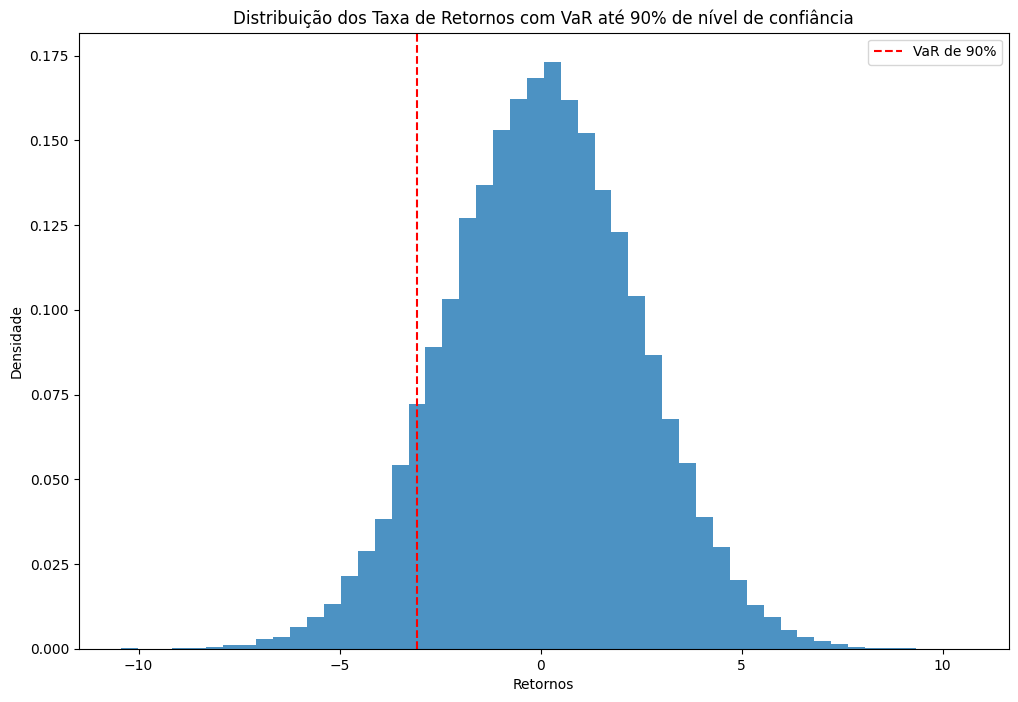

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.hist(array_retornos_aleatorios, bins=50, density=True, alpha=0.8)
ax.axvline(
    x=var_90, color="r", linestyle="--", label=f"VaR de {nivel_confianca*100:.0f}%"
)
ax.legend()
ax.set_xlabel("Retornos")
ax.set_ylabel("Densidade")
ax.set_title("Distribuição dos Taxa de Retornos com VaR até 90% de nível de confiância")
plt.show()

### Análise do Gráfico

O gráfico mostra a distribuição simétrica da taxa de retornos do portfólio, indicando uma forma próxima à normal, com a maioria dos retornos concentrados em torno do valor central e extremos menos frequentes. 

A <span style="color:red">linha pontilhada vermelha</span> representa o **Valor em Risco (VaR) de 90%**, indicando que, em 90% dos casos, as perdas não excederão entre -3% e -5%, com uma chance de 10% de perdas maiores. 

Isso reflete um risco moderado, importante para investidores avaliarem a exposição a perdas extremas e ajustarem a alocação do portfólio para mitigar riscos ou confirmar sua aceitação dentro de níveis planejados.


In [ ]:
var_90 = calcular_value_risk_var(df_acoes_alocados["Soma Ganhos"], nivel_confianca)
print(f"VaR no intervalo de confiância de 90%: {var_90.round(2)}")

media_soma_ganhos = df_acoes_alocados["Soma Ganhos"].mean()
desvio_padrao_soma_ganhos = df_acoes_alocados["Soma Ganhos"].std()
print(f"Media das Soma Ganhos: {media_soma_ganhos.round(2)}")
print(f"Desvio Padrão das Soma Ganhos: {desvio_padrao_soma_ganhos.round(2)}")

VaR no intervalo de confiância de 90%: -113754.52
Media das Soma Ganhos: 67116.32
Desvio Padrão das Soma Ganhos: 36399.33


In [ ]:
np.random.seed(42)

# Criando um array de retornos aleatórios com a numero de carterias definidas
array_retornos_aleatorios = np.random.normal(
    media_soma_ganhos, desvio_padrao_soma_ganhos, numero_carteiras
)

# Calcula o VaR com o intervalo de confiança definido
var_90 = calcular_value_risk_var(array_retornos_aleatorios, nivel_confianca)

### Plotando os resultados dos valores da soma dos ganhos com VaR


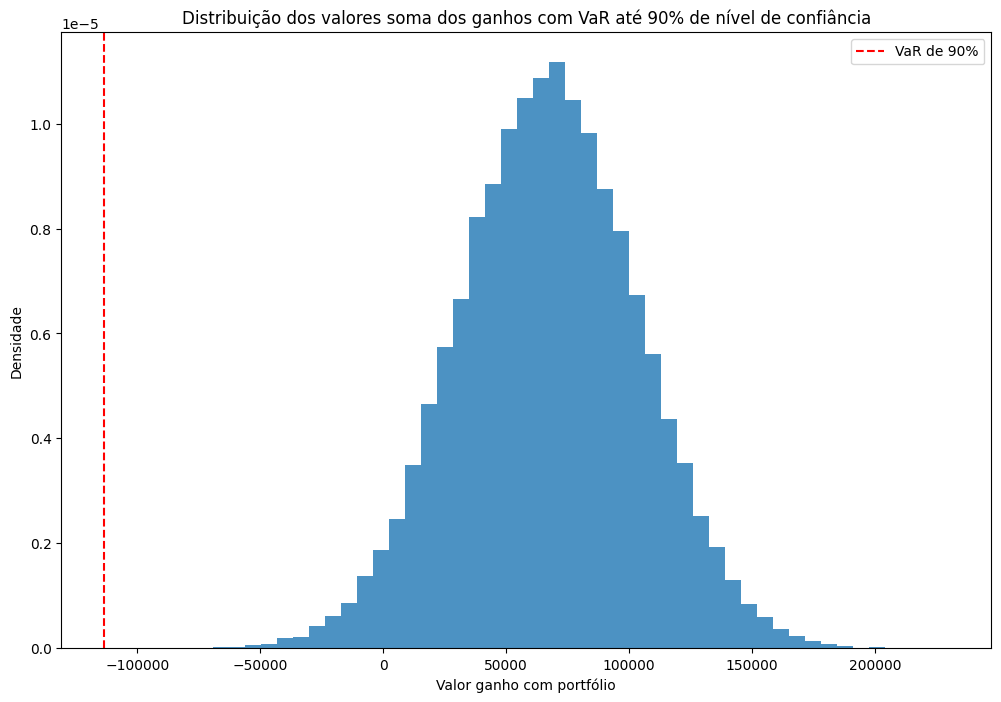

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.hist(array_retornos_aleatorios, bins=50, density=True, alpha=0.8)
ax.axvline(
    x=var_90, color="r", linestyle="--", label=f"VaR de {nivel_confianca*100:.0f}%"
)
ax.legend()
ax.set_xlabel("Valor ganho com portfólio")
ax.set_ylabel("Densidade")
ax.set_title(
    "Distribuição dos valores soma dos ganhos com VaR até 90% de nível de confiância"
)
plt.show()

### Analise do gráfico

O gráfico apresenta a distribuição simétrica dos ganhos do portfólio, predominantemente em valores positivos próximos de zero, sugerindo retornos geralmente favoráveis. O **VaR de 90%**, indicado por uma <span style="color:red">linha vermelha pontilhada</span>, representa a perda máxima esperada nos 10% piores cenários, sendo mais negativo em situações de maior risco. 

A análise destaca a importância de avaliar as caudas da distribuição, especialmente a esquerda, para identificar riscos de eventos raros e planejar estratégias de mitigação, como diversificação. 

Assim, o **VaR de 90%** é uma ferramenta crucial para entender a segurança do portfólio e equilibrar riscos e retornos.
